## Classe Dataset

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from utils import Dataset

In [3]:
dataset = Dataset()

In [4]:
df, coeff_vector = dataset.create_dataframe(10)

In [5]:
df.head()

,x,y,bias,class
0,-0.133458,0.362201,1.0,-1.0
1,-0.509127,0.386534,1.0,-1.0
2,-0.185375,-0.027919,1.0,-1.0
3,-0.020851,-0.196298,1.0,-1.0
4,0.016790,-0.165297,1.0,-1.0


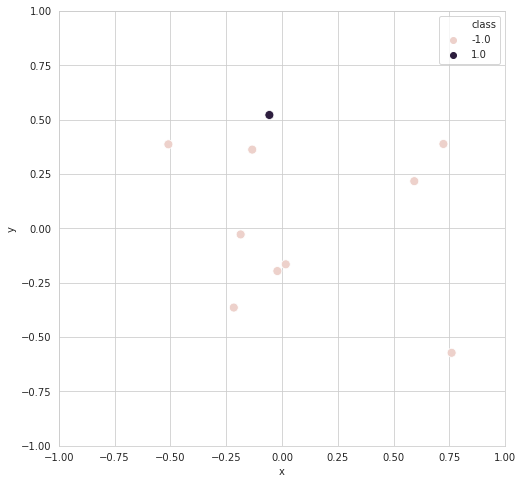

In [6]:
dataset.plot_data(df)

---

In [7]:
from perceptron import Perceptron

In [8]:
perceptron = Perceptron()

In [9]:
RUNS = 1000

results = perceptron.run_epoch(RUNS, 10)

results_df = perceptron.generate_results_dataframe(results, ['iterations', 'misclassified_rate'])
results_df.mean(axis=0)

iterations            10.157000
misclassified_rate     0.109694
dtype: float64

In [10]:
RUNS = 1000

results = perceptron.run_epoch(RUNS, 100)

results_df = perceptron.generate_results_dataframe(results, ['iterations', 'misclassified_rate'])
results_df.mean(axis=0)

iterations            99.538000
misclassified_rate     0.013691
dtype: float64

---

In [1]:
from linear_regression import LinearRegression

In [2]:
lr = LinearRegression()

In [3]:
RUNS = 1000

results = lr.run_epoch(RUNS, 100)
results_df = lr.generate_results_dataframe(results, ['E_in', 'E_out'])
results_df.mean(axis=0)

E_in     0.040320
E_out    0.048255
dtype: float64